# Banking Data Analysis

## 1) Data Gathering

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [2]:
df1 = pd.read_csv("banking_data.csv")
df1

,age,job,marital,marital_status,education,default,balance,housing,loan,contact,day,month,day_month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,married,tertiary,no,2143,yes,no,unknown,5,may,5-May,261,1,-1,0,unknown,no
1,44,technician,single,single,secondary,no,29,yes,no,unknown,5,may,5-May,151,1,-1,0,unknown,no
2,33,entrepreneur,married,married,secondary,no,2,yes,yes,unknown,5,may,5-May,76,1,-1,0,unknown,no
3,47,blue-collar,married,married,unknown,no,1506,yes,no,unknown,5,may,5-May,92,1,-1,0,unknown,no
4,33,unknown,single,single,unknown,no,1,no,no,unknown,5,may,5-May,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45211,29,management,single,single,tertiary,no,765,no,no,cellular,16,nov,16-Nov,238,1,-1,0,unknown,yes
45212,68,retired,married,married,secondary,no,1146,no,no,cellular,16,nov,16-Nov,212,1,187,6,success,yes
45213,53,management,married,married,tertiary,no,583,no,no,cellular,17,nov,17-Nov,226,1,184,4,success,yes
45214,73,retired,married,married,secondary,no,2850,no,no,cellular,17,nov,17-Nov,300,1,40,8,failure,yes


## 2) Data Assessing


### a) Brief summary of the data

The dataset consists of records from direct marketing campaigns conducted by a Portuguese banking institution between May 2008 and November 2010. With 45,211 rows and 18 columns, the primary objective is to predict whether clients subscribed to term deposits following phone-based marketing efforts. Each row represents a client contacted during these campaigns, with the target variable (`y`) indicating subscription outcome (`yes` or `no`). The dataset likely includes a range of features such as demographic data, client financial details, and specifics of the marketing interactions (e.g., number of calls, duration). The campaigns utilized various outreach strategies including email, advertisements, and telephonic marketing, with emphasis on the latter due to its perceived effectiveness despite requiring significant resources. The dataset aims to enable analysis aimed at optimizing marketing strategies, targeting potential subscribers more accurately, and potentially reducing costs associated with large-scale telephonic campaigns.

### b) Column descriptions

1. **age**: Numeric variable indicating the age of the bank client in years.
   
2. **job**: Categorical variable indicating the type of job the client has (e.g., "admin.", "unknown", "unemployed", "management", etc.).
   
3. **marital**: Categorical variable indicating the marital status of the client (e.g., "married", "divorced", "single").
   
4. **education**: Categorical variable indicating the level of education of the client (e.g., "unknown", "secondary", "primary", "tertiary").
   
5. **default**: Binary variable indicating whether the client has credit in default (options: "yes" or "no").
   
6. **balance**: Numeric variable representing the average yearly balance in euros for the client.
   
7. **housing**: Binary variable indicating whether the client has a housing loan (options: "yes" or "no").
   
8. **loan**: Binary variable indicating whether the client has a personal loan (options: "yes" or "no").
   
9. **contact**: Categorical variable indicating the type of communication used to contact the client (e.g., "unknown", "telephone", "cellular").
   
10. **day**: Numeric variable representing the last contact day of the month.
   
11. **month**: Categorical variable representing the last contact month of the year (e.g., "jan", "feb", "mar", etc.).
   
12. **duration**: Numeric variable representing the duration of the last contact in seconds.
   
13. **campaign**: Numeric variable representing the number of contacts performed during this campaign for this client.
   
14. **pdays**: Numeric variable representing the number of days that passed by after the client was last contacted from a previous campaign (-1 means the client was not previously contacted).
   
15. **previous**: Numeric variable representing the number of contacts performed before this campaign for this client.
   
16. **poutcome**: Categorical variable representing the outcome of the previous marketing campaign (e.g., "unknown", "other", "failure", "success").
   
17. **y**: Binary variable indicating whether the client has subscribed to a term deposit (target variable: "yes" or "no").


### c) Additional information

Data set provided contains columns ordered by date (from May 2008 to November 2010). But the year column is missing which has to be added.

### d) Issues with the dataset

`1. Dirty Data (Quality Issues)`

+ **year** column is missing `Completeness`

+ **education** column has missing data in 3 rows (rows 44957, 45137, 45170) `Completeness`

+ **marital** and **marital_status** has missing data in the same 3 rows (rows 44996, 45077, 45209) `Completeness`

+ **job**, **marital**, **marital_status**, **education**, **default**, **housing**, **loan**, **contact**, **poutcome** and **y**; all of these columns' datatypes should be changed to Categorical `Validity`

+ There are 5 duplicated rows (row 45211 is duplicate of 45192, row 45212 is duplicate of 45195, row 45213 is duplicate of 45201, row 45214 is duplicate of 45204, row 45215 is duplicate of 45207) `Validity`

`2. Messy Data (Structural Issues)`

+ Apart from **day**, **month** columns there exists an extra column **day_month**, also since **year** is missing, **year** should be added and all of them should be merged into a single **date** column with datetime datatype removing all other **day**, **month** and **day_month** columns

+ There are 2 duplicated columns containing the same data i.e. **marital** and **marital_status**, one of them should be dropped

In [25]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45216 entries, 0 to 45215
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45216 non-null  int64 
 1   job             45216 non-null  object
 2   marital         45213 non-null  object
 3   marital_status  45213 non-null  object
 4   education       45213 non-null  object
 5   default         45216 non-null  object
 6   balance         45216 non-null  int64 
 7   housing         45216 non-null  object
 8   loan            45216 non-null  object
 9   contact         45216 non-null  object
 10  day             45216 non-null  int64 
 11  month           45216 non-null  object
 12  day_month       45216 non-null  object
 13  duration        45216 non-null  int64 
 14  campaign        45216 non-null  int64 
 15  pdays           45216 non-null  int64 
 16  previous        45216 non-null  int64 
 17  poutcome        45216 non-null  object
 18  y     

In [26]:
df1.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45216.000000,45216.000000,45216.000000,45216.000000,45216.000000,45216.000000,45216.000000
mean,40.938186,1362.277844,15.806507,258.166202,2.763668,40.202428,0.580657
std,10.621249,3044.609674,8.322022,257.515482,3.097896,100.128248,2.303778
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.500000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [27]:
df1[df1['marital'].isna()]

,age,job,marital,marital_status,education,default,balance,housing,loan,contact,day,month,day_month,duration,campaign,pdays,previous,poutcome,y
44996,75,retired,NaN,NaN,secondary,no,1092,no,no,telephone,12,oct,12-Oct,250,1,431,2,failure,no
45077,20,student,NaN,NaN,secondary,no,88,no,no,telephone,21,oct,21-Oct,621,1,181,4,other,no
45209,57,blue-collar,NaN,NaN,secondary,no,668,no,no,telephone,17,nov,17-Nov,508,4,-1,0,unknown,no


In [28]:
df1[df1['marital_status'].isna()]

,age,job,marital,marital_status,education,default,balance,housing,loan,contact,day,month,day_month,duration,campaign,pdays,previous,poutcome,y
44996,75,retired,NaN,NaN,secondary,no,1092,no,no,telephone,12,oct,12-Oct,250,1,431,2,failure,no
45077,20,student,NaN,NaN,secondary,no,88,no,no,telephone,21,oct,21-Oct,621,1,181,4,other,no
45209,57,blue-collar,NaN,NaN,secondary,no,668,no,no,telephone,17,nov,17-Nov,508,4,-1,0,unknown,no


In [29]:
df1[df1['education'].isna()]

,age,job,marital,marital_status,education,default,balance,housing,loan,contact,day,month,day_month,duration,campaign,pdays,previous,poutcome,y
44957,32,management,single,single,NaN,no,3289,no,no,cellular,8,oct,8-Oct,375,2,179,2,failure,no
45137,30,management,single,single,NaN,no,297,no,no,cellular,8,nov,8-Nov,188,1,-1,0,unknown,yes
45170,19,student,single,single,NaN,no,245,no,no,telephone,10,nov,10-Nov,98,2,110,2,other,no


In [30]:
df1[df1.duplicated(keep=False)]

,age,job,marital,marital_status,education,default,balance,housing,loan,contact,day,month,day_month,duration,campaign,pdays,previous,poutcome,y
45192,29,management,single,single,tertiary,no,765,no,no,cellular,16,nov,16-Nov,238,1,-1,0,unknown,yes
45195,68,retired,married,married,secondary,no,1146,no,no,cellular,16,nov,16-Nov,212,1,187,6,success,yes
45201,53,management,married,married,tertiary,no,583,no,no,cellular,17,nov,17-Nov,226,1,184,4,success,yes
45204,73,retired,married,married,secondary,no,2850,no,no,cellular,17,nov,17-Nov,300,1,40,8,failure,yes
45207,71,retired,divorced,divorced,primary,no,1729,no,no,cellular,17,nov,17-Nov,456,2,-1,0,unknown,yes
45211,29,management,single,single,tertiary,no,765,no,no,cellular,16,nov,16-Nov,238,1,-1,0,unknown,yes
45212,68,retired,married,married,secondary,no,1146,no,no,cellular,16,nov,16-Nov,212,1,187,6,success,yes
45213,53,management,married,married,tertiary,no,583,no,no,cellular,17,nov,17-Nov,226,1,184,4,success,yes
45214,73,retired,married,married,secondary,no,2850,no,no,cellular,17,nov,17-Nov,300,1,40,8,failure,yes
45215,71,retired,divorced,divorced,primary,no,1729,no,no,cellular,17,nov,17-Nov,456,2,-1,0,unknown,yes


In [31]:
df1['job'].value_counts()

job
blue-collar      9732
management       9460
technician       7597
admin.           5171
services         4154
retired          2267
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64

In [32]:
df1['marital_status'].value_counts()

marital_status
married     27216
single      12790
divorced     5207
Name: count, dtype: int64

In [33]:
df1['education'].value_counts()

education
secondary    23204
tertiary     13301
primary       6851
unknown       1857
Name: count, dtype: int64

In [34]:
df1['default'].value_counts()

default
no     44401
yes      815
Name: count, dtype: int64

In [35]:
df1['housing'].value_counts()

housing
yes    25130
no     20086
Name: count, dtype: int64

In [36]:
df1['loan'].value_counts()

loan
no     37972
yes     7244
Name: count, dtype: int64

In [37]:
df1['contact'].value_counts()

contact
cellular     29290
unknown      13020
telephone     2906
Name: count, dtype: int64

In [38]:
df1['month'].value_counts()

month
may    13766
jul     6895
aug     6247
jun     5341
nov     3975
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: count, dtype: int64

In [39]:
df1['poutcome'].value_counts()

poutcome
unknown    36961
failure     4902
other       1840
success     1513
Name: count, dtype: int64

In [40]:
df1['y'].value_counts()

y
no     39922
yes     5294
Name: count, dtype: int64

## 3) Data Cleaning

In [3]:
# copy of the dataframe on which cleaning operations will be done
df2 = df1.copy()

### a. Let's first deal with the structural issues

+ `marital` and `marital_status` both have same values, so they are duplicate columns. Thus we drop `marital_status`.


In [4]:
df2.drop("marital_status", axis=1, inplace=True)

+ Now we have to add `year` info to the dataset and merge `day`, `month`, `year` into one column i.e. `date` and remove `day`, `month`, `day_month` and `year` columns.

In [5]:
yr = [2008]
mnthDict = {"jan":1, "feb":2, "mar":3, "apr":4, "may":5, "jun":6, "jul":7, "aug":8, "sep":9, "oct":10, "nov":11, "dec":12}
for i in df2.index:
    if(i != 0):
        if(mnthDict[df2.iloc[i]['month']] < mnthDict[df2.iloc[i-1]['month']]):
            yr.append(yr[i-1]+1)
        else:
            yr.append(yr[i-1])
df2["year"] = yr

+ Added `year` column.

In [10]:
df2["date"] = pd.Series(df2["day"].astype("str")+"/"+df2["month"]+"/"+df2["year"].astype("str"))

df2["date"]=pd.to_datetime(df2["date"], format="%d/%b/%Y")

df2.drop(["day","month","year","day_month"], axis=1, inplace=True)
df2

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,y,date
0,58,management,married,tertiary,no,2143,yes,no,unknown,261,1,-1,0,unknown,no,2008-05-05
1,44,technician,single,secondary,no,29,yes,no,unknown,151,1,-1,0,unknown,no,2008-05-05
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,76,1,-1,0,unknown,no,2008-05-05
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,92,1,-1,0,unknown,no,2008-05-05
4,33,unknown,single,unknown,no,1,no,no,unknown,198,1,-1,0,unknown,no,2008-05-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45211,29,management,single,tertiary,no,765,no,no,cellular,238,1,-1,0,unknown,yes,2010-11-16
45212,68,retired,married,secondary,no,1146,no,no,cellular,212,1,187,6,success,yes,2010-11-16
45213,53,management,married,tertiary,no,583,no,no,cellular,226,1,184,4,success,yes,2010-11-17
45214,73,retired,married,secondary,no,2850,no,no,cellular,300,1,40,8,failure,yes,2010-11-17


In [11]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45216 entries, 0 to 45215
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   age        45216 non-null  int64         
 1   job        45216 non-null  object        
 2   marital    45213 non-null  object        
 3   education  45213 non-null  object        
 4   default    45216 non-null  object        
 5   balance    45216 non-null  int64         
 6   housing    45216 non-null  object        
 7   loan       45216 non-null  object        
 8   contact    45216 non-null  object        
 9   duration   45216 non-null  int64         
 10  campaign   45216 non-null  int64         
 11  pdays      45216 non-null  int64         
 12  previous   45216 non-null  int64         
 13  poutcome   45216 non-null  object        
 14  y          45216 non-null  object        
 15  date       45216 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(6), object(9

+ Added `date` column with datetime datatype and removed `day`, `month`, `year` and `day_month` columns.

### b. Now let's deal with the completeness issues

+ `marital` and `education`, both the columns have 3 missing values.

+ We have no idea as to what should be filled in these missing values' places in `marital`, so we shall fill these na places with string "*Data not available*".

+ As for `education` we have a category *unknown* so we can fill these na place with *unknown*.

In [12]:
df2["marital"] = df2["marital"].fillna("Data not available")

df2["education"] = df2["education"].fillna("unknown")

In [13]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45216 entries, 0 to 45215
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   age        45216 non-null  int64         
 1   job        45216 non-null  object        
 2   marital    45216 non-null  object        
 3   education  45216 non-null  object        
 4   default    45216 non-null  object        
 5   balance    45216 non-null  int64         
 6   housing    45216 non-null  object        
 7   loan       45216 non-null  object        
 8   contact    45216 non-null  object        
 9   duration   45216 non-null  int64         
 10  campaign   45216 non-null  int64         
 11  pdays      45216 non-null  int64         
 12  previous   45216 non-null  int64         
 13  poutcome   45216 non-null  object        
 14  y          45216 non-null  object        
 15  date       45216 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(6), object(9

In [14]:
df2.iloc[45170]

age                           19
job                      student
marital                   single
education                unknown
default                       no
balance                      245
housing                       no
loan                          no
contact                telephone
duration                      98
campaign                       2
pdays                        110
previous                       2
poutcome                   other
y                             no
date         2010-11-10 00:00:00
Name: 45170, dtype: object

In [15]:
df2.iloc[44996]

age                           75
job                      retired
marital       Data not available
education              secondary
default                       no
balance                     1092
housing                       no
loan                          no
contact                telephone
duration                     250
campaign                       1
pdays                        431
previous                       2
poutcome                 failure
y                             no
date         2010-10-12 00:00:00
Name: 44996, dtype: object

+ Now the na values have been filled.

### c. Now finally we deal with the validity issues

+ First, we shall drop the duplicate rows.

In [16]:
df2.drop_duplicates(inplace=True)
df2

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,y,date
0,58,management,married,tertiary,no,2143,yes,no,unknown,261,1,-1,0,unknown,no,2008-05-05
1,44,technician,single,secondary,no,29,yes,no,unknown,151,1,-1,0,unknown,no,2008-05-05
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,76,1,-1,0,unknown,no,2008-05-05
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,92,1,-1,0,unknown,no,2008-05-05
4,33,unknown,single,unknown,no,1,no,no,unknown,198,1,-1,0,unknown,no,2008-05-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,977,3,-1,0,unknown,yes,2010-11-17
45207,71,retired,divorced,primary,no,1729,no,no,cellular,456,2,-1,0,unknown,yes,2010-11-17
45208,72,retired,married,secondary,no,5715,no,no,cellular,1127,5,184,3,success,yes,2010-11-17
45209,57,blue-collar,Data not available,secondary,no,668,no,no,telephone,508,4,-1,0,unknown,no,2010-11-17


+ Now we shall change the required columns into categorical type.

In [17]:
df2[['job','marital','education','default','housing','loan','contact','poutcome','y']] = df2[['job','marital','education','default','housing','loan','contact','poutcome','y']].astype('category')

df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45211 entries, 0 to 45210
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   age        45211 non-null  int64         
 1   job        45211 non-null  category      
 2   marital    45211 non-null  category      
 3   education  45211 non-null  category      
 4   default    45211 non-null  category      
 5   balance    45211 non-null  int64         
 6   housing    45211 non-null  category      
 7   loan       45211 non-null  category      
 8   contact    45211 non-null  category      
 9   duration   45211 non-null  int64         
 10  campaign   45211 non-null  int64         
 11  pdays      45211 non-null  int64         
 12  previous   45211 non-null  int64         
 13  poutcome   45211 non-null  category      
 14  y          45211 non-null  category      
 15  date       45211 non-null  datetime64[ns]
dtypes: category(9), datetime64[ns](1), int64(6)
m

## 3) Exploratory Data Analysis

### a. What is the distribution of age among the clients?

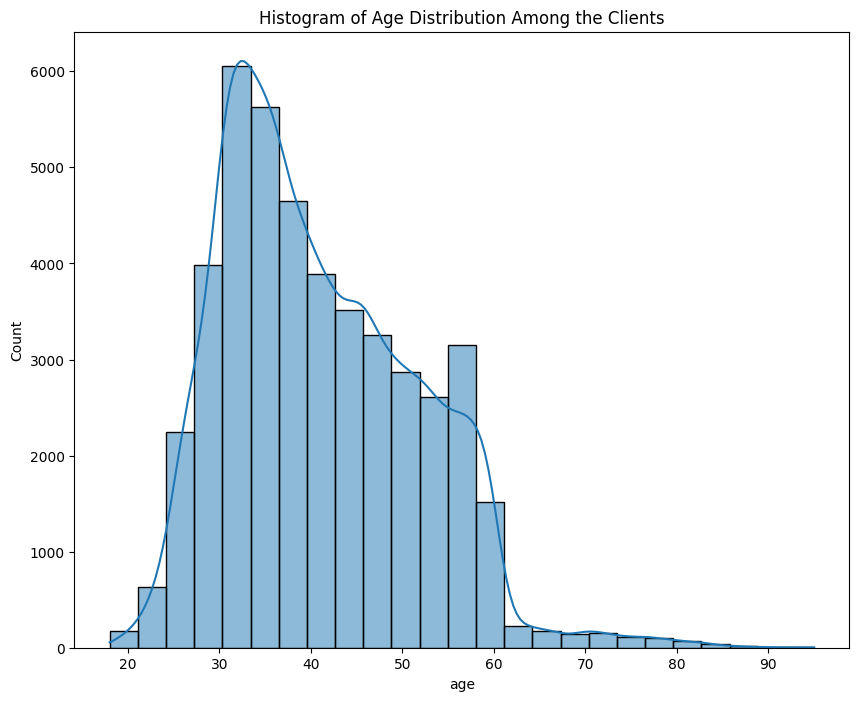

In [18]:
plt.figure(figsize=(10,8))
sns.histplot(data=df2, x="age", bins=25, kde=True)
plt.title("Histogram of Age Distribution Among the Clients")
plt.show()

In [90]:
len(df2[(df2["age"]>=20) & (df2["age"]<=60)])/len(df2)*100

97.26836389374267

In [91]:
df2["age"].median()

39.0

+ Most of the clients (nearly 97%) have their ages between 20 to 60.
+ Median of the ages of the clients is 39 years.
+ The distribution is right skewed.

### b. How does the job type vary among the clients?

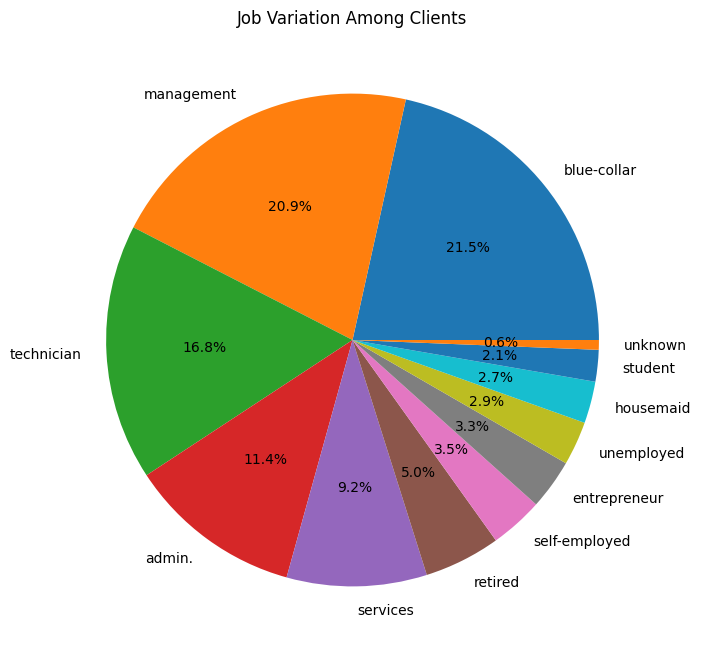

In [92]:
plt.figure(figsize=(10,8))
plt.pie(df2["job"].value_counts().values,labels = df2["job"].value_counts().keys(), autopct = '%0.1f%%')
plt.title("Job Variation Among Clients")
plt.show()

+ **unknown** category has smallest no. of clients(0.6%) followed by **student** category which has 2.1%
+ Most of the clients have **blue collar** and **management** jobs (nearly 42.4%)
+ The clients who are **self-employed**, **entrepreneurs**, **unemployed**, **housemaids**, and **students** are relatively less.

### c. What is the marital status distribution of the clients?

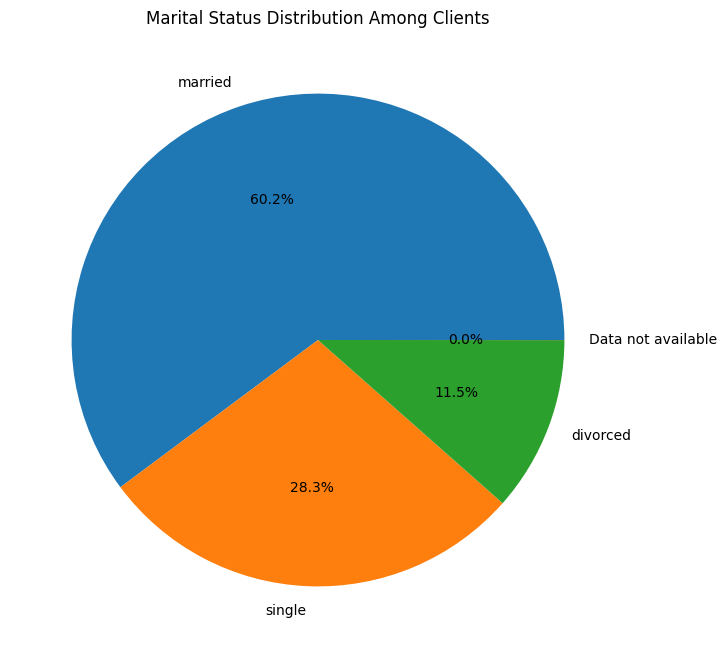

In [93]:
plt.figure(figsize=(10,8))
plt.pie(df2["marital"].value_counts().values,labels = df2["marital"].value_counts().keys(), autopct = '%0.1f%%')
plt.title("Marital Status Distribution Among Clients")
plt.show()

+ Most of the clients are **married** (nearly 60.2%) followed by **single** clients(28.3%) and **divorced** clients(11.5%).
+ There are very few clients with **"Data not available"** indicating their marital status is not known.

### d. What is the level of education among the clients?

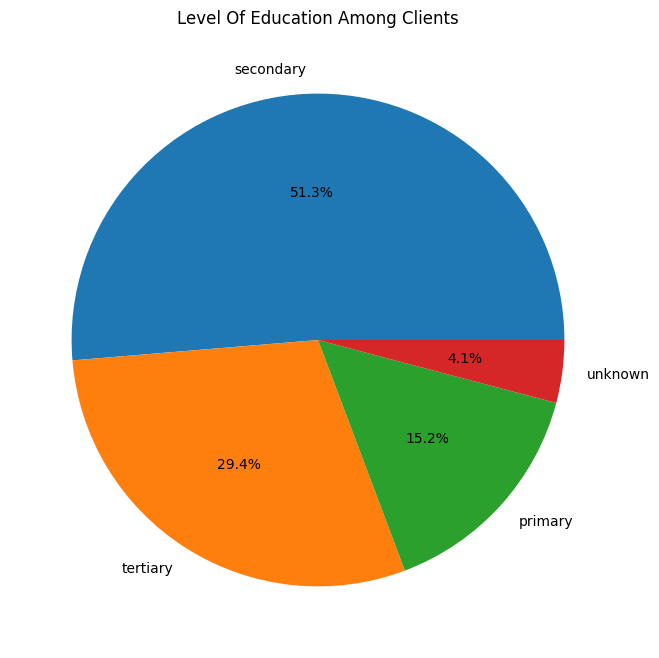

In [94]:
plt.figure(figsize=(10,8))
plt.pie(df2["education"].value_counts().values,labels = df2["education"].value_counts().keys(), autopct = '%0.1f%%')
plt.title("Level Of Education Among Clients")
plt.show()

+ Most of the clients have **secondary** level of education (nearly 51.3%) followed by those having **tertiary** (29.4%) and **primary** levels of education (15.2%)
+ There are a few clients with **"unknown"** (nearly 4.1%) indicating their level of education is not known.

### e. What proportion of clients have credit in default?

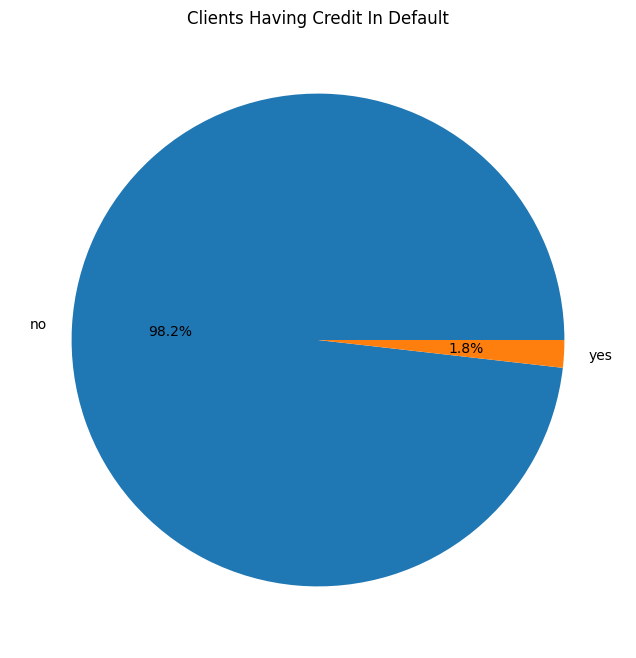

In [95]:
plt.figure(figsize=(10,8))
plt.pie(df2["default"].value_counts().values,labels = df2["default"].value_counts().keys(), autopct = '%0.1f%%')
plt.title("Clients Having Credit In Default")
plt.show()

In [96]:
len(df2[df2["default"]=="yes"])

815

+ As we can see from the pie chart that only 1.8% (815 clients) of clients have their credits in **default**.

### f. What is the distribution of average yearly balance among the clients?

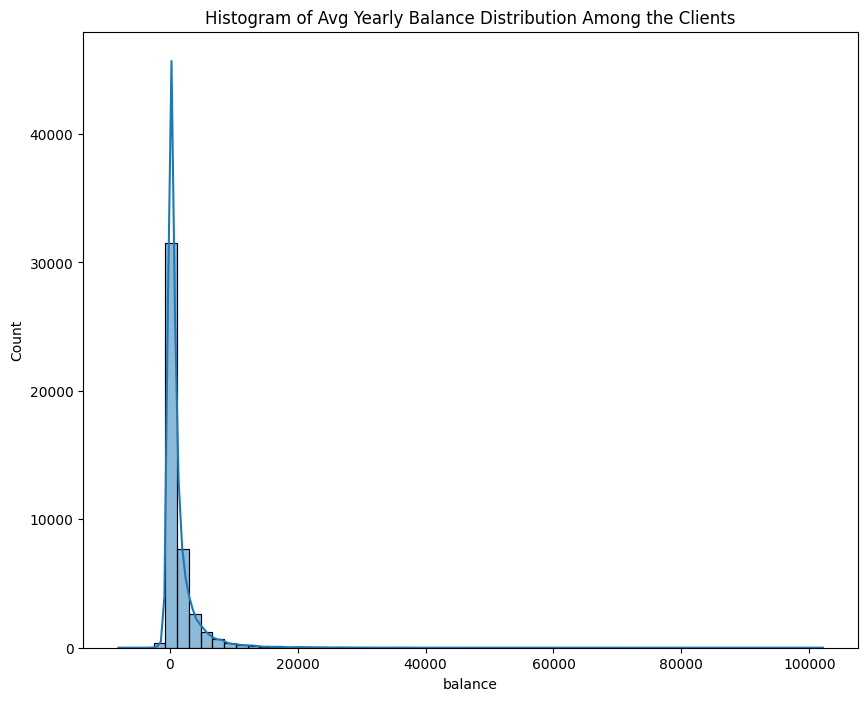

In [97]:
plt.figure(figsize=(10,8))
sns.histplot(data=df2, x="balance", bins=60, kde=True)
plt.title("Histogram of Avg Yearly Balance Distribution Among the Clients")
plt.show()

In [98]:
len(df2[df2["balance"]<0])

3766

In [99]:
df2["balance"].median()

448.0

In [100]:
len(df2[df2["balance"]>20000])

193

+ Most of the clients have relatively low average yearly **balance**.
+ Few (3766) clients have negative average yearly **balance**.
+ The median average yearly **balance** is 448 which is relatively low.
+ There are very few clients having high average yearly **balance**. For example: no. of clients having average yearly **balance**>20000 is 193 which is very less.

### g. How many clients have housing loans?

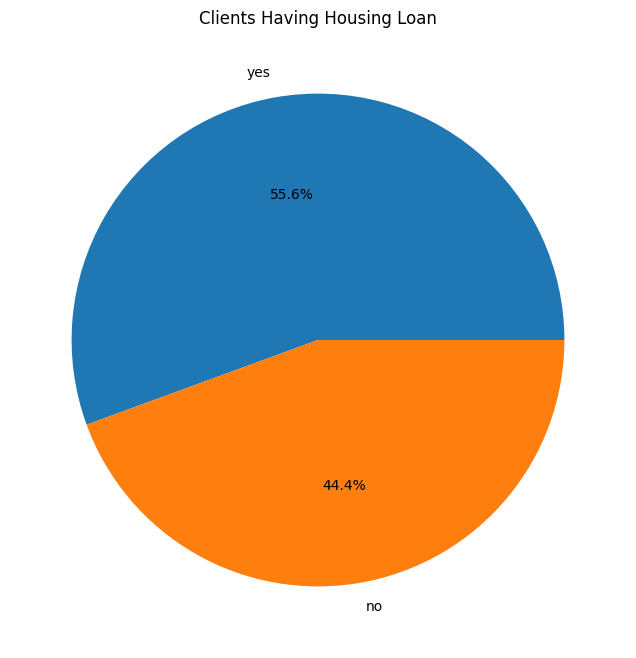

In [101]:
plt.figure(figsize=(10,8))
plt.pie(df2["housing"].value_counts().values,labels = df2["housing"].value_counts().keys(), autopct = '%0.1f%%')
plt.title("Clients Having Housing Loan")
plt.show()

In [102]:
len(df2[df2["housing"]=="yes"])

25130

+ As we can see from the pie chart that majority of clients i.e. 55.6% (25130) clients have **housing** loan.

### h. How many clients have personal loans?

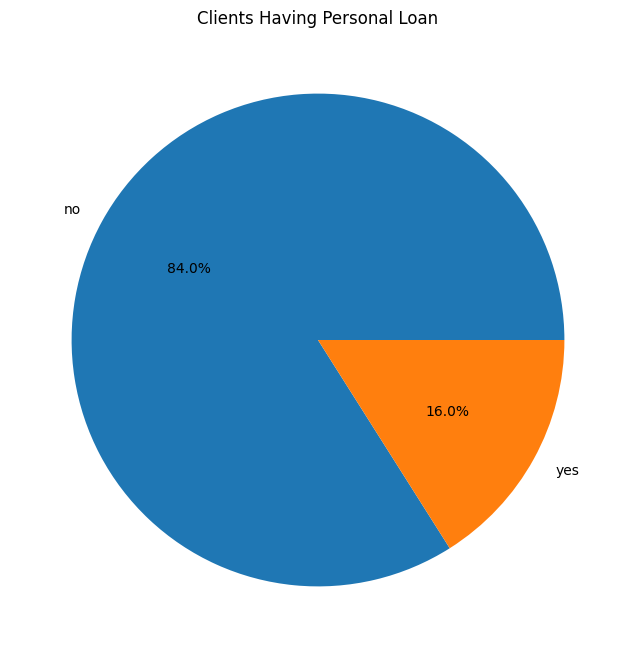

In [103]:
plt.figure(figsize=(10,8))
plt.pie(df2["loan"].value_counts().values,labels = df2["loan"].value_counts().keys(), autopct = '%0.1f%%')
plt.title("Clients Having Personal Loan")
plt.show()

In [104]:
len(df2[df2["loan"]=="yes"])

7244

+ As we can see from the pie chart that few clients i.e. 16% (7244) clients have personal **loan**.

### i. What are the communication types used for contacting clients during the campaign?

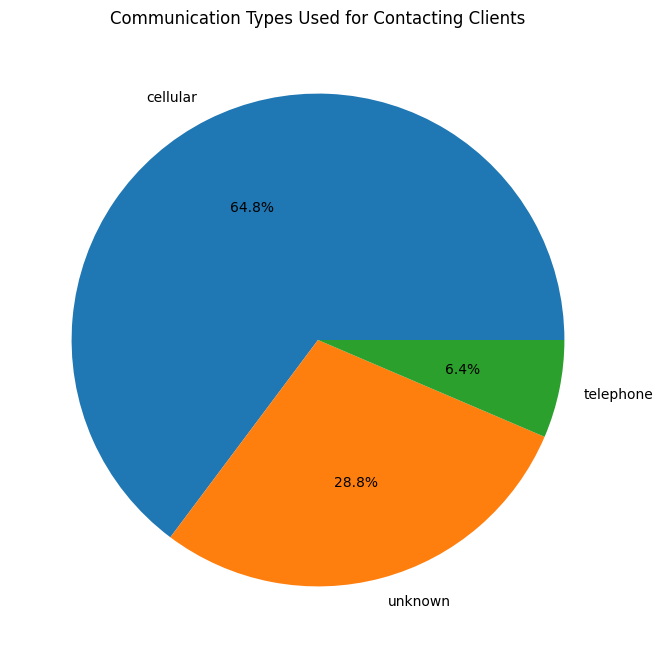

In [105]:
plt.figure(figsize=(10,8))
plt.pie(df2["contact"].value_counts().values,labels = df2["contact"].value_counts().keys(), autopct = '%0.1f%%')
plt.title("Communication Types Used for Contacting Clients")
plt.show()

+ Mostly **cellular** communication was used to contact clients(nearly 64.8%).
+ There are clients with **"unknown"** communication type (nearly 28.8%) indicating that the communication types used for contacting those clients is not known.
+ Few clients were contacted through **telephone** (nearly 6.4%)

### j. What is the distribution of the last contact day of the month?

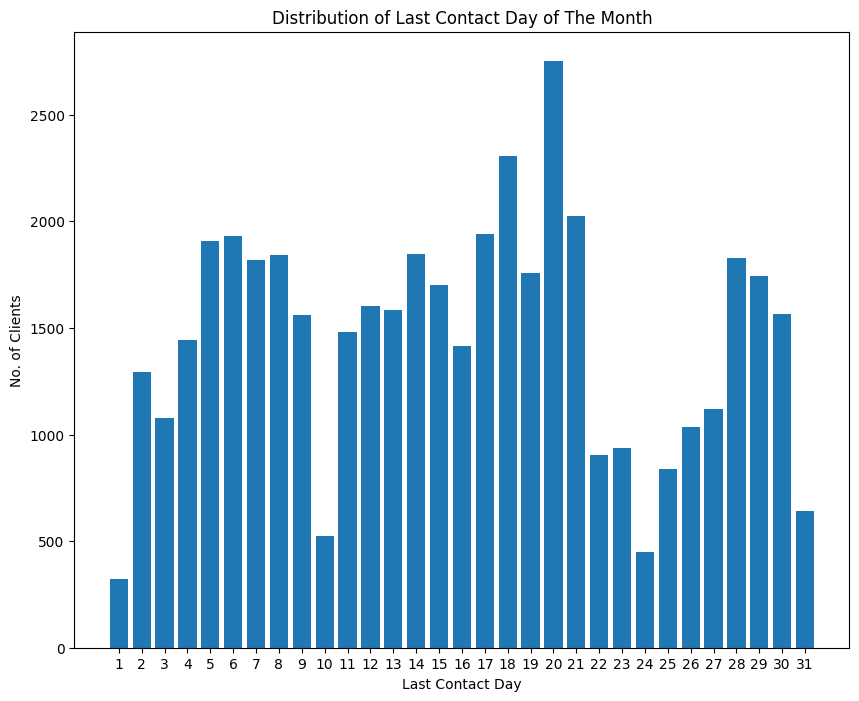

In [106]:
plt.figure(figsize=(10,8))
plt.bar(list(df2["date"].dt.day.value_counts(sort=True).keys()),list(df2["date"].dt.day.value_counts(sort=True).values))
plt.xticks(ticks=np.arange(1,32))
plt.xlabel("Last Contact Day")
plt.ylabel("No. of Clients")
plt.title("Distribution of Last Contact Day of The Month")
plt.show()

+ Days 1,10,24 and 31 have lower activity.
+ This distribution is non uniform across the month.
+ In the midle of the month there is significant increase in activity (especially on day 20).

### k. How does the last contact month vary among the clients?

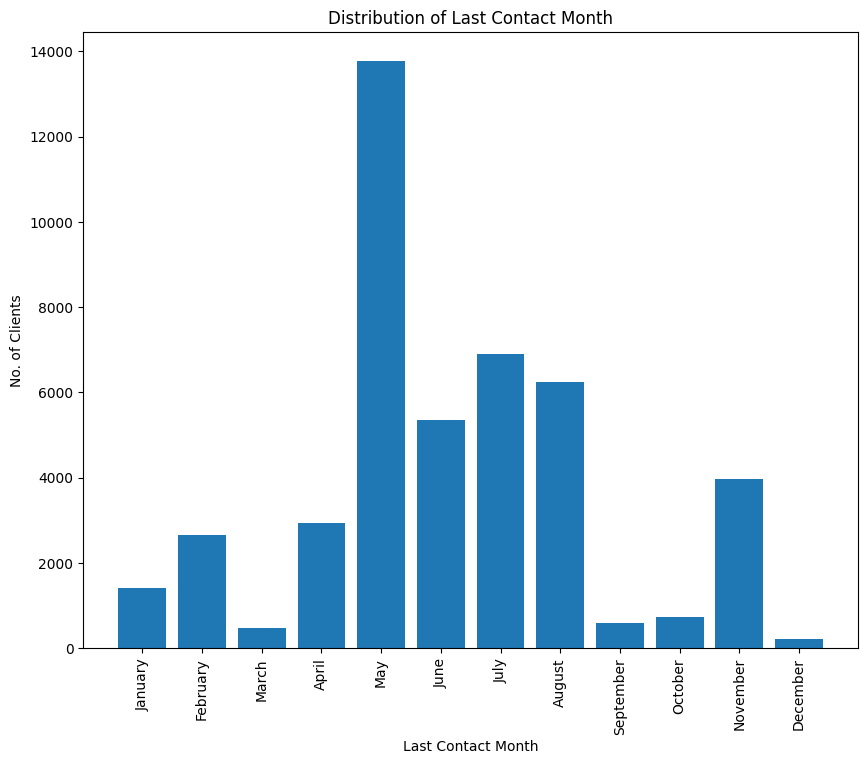

In [107]:
plt.figure(figsize=(10,8))
plt.bar(list(df2["date"].dt.month.value_counts(sort=True).keys()),list(df2["date"].dt.month.value_counts(sort=True).values))
plt.xticks(np.arange(1,13), ['January','February','March','April','May','June','July','August','September','October','November',"December"], rotation='vertical')
plt.xlabel("Last Contact Month")
plt.ylabel("No. of Clients")
plt.title("Distribution of Last Contact Month")
plt.show()

+ **May** has the highest number of contacts with client suggesting a boom in marketing activities.
+ **March**, **September**, **October** and **December** has relatively lower number of contacts with client.
+ Rest months have moderate number of contacts.

### l. What is the distribution of the duration of the last contact?

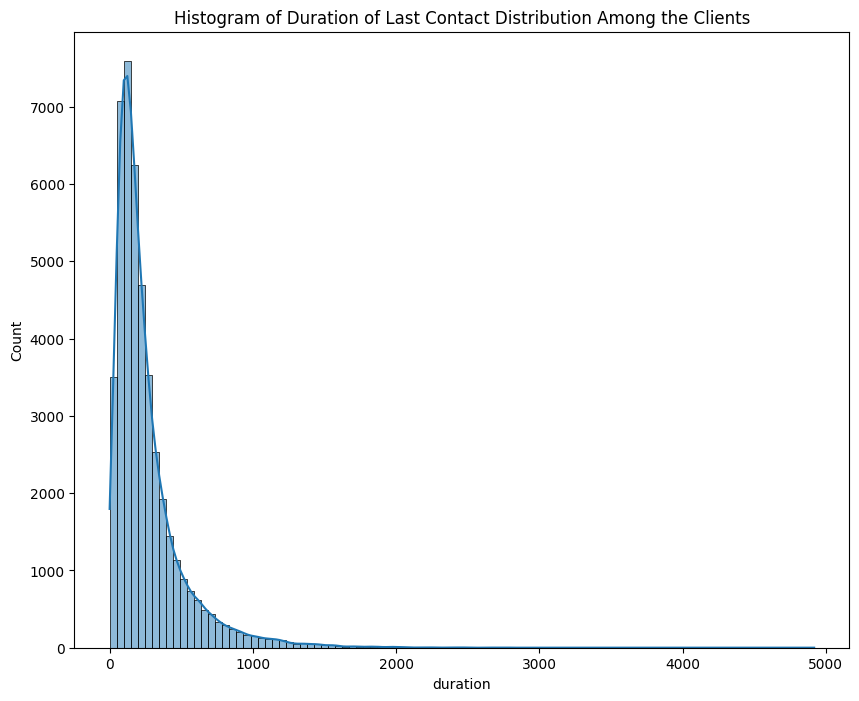

In [108]:
plt.figure(figsize=(10,8))
sns.histplot(data=df2, x="duration", bins=100, kde=True)
plt.title("Histogram of Duration of Last Contact Distribution Among the Clients")
plt.show()

In [109]:
df2["duration"].median()

180.0

+ The median of contact **duration** is 180 seconds.
+ Most of the calls were of short **durations**, showing focus on quick interactions.
+ Only few calls have very long **duration**.
+ This distribution is highly right skewed as number of calls decreases rapidly as call **duration** increases.


### m. How many contacts were performed during the campaign for each client?

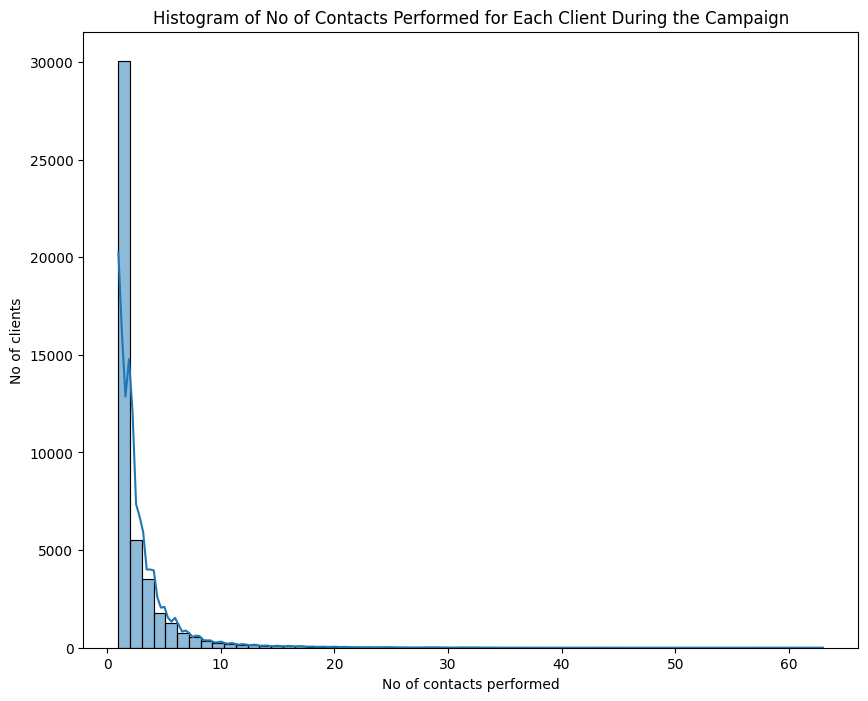

In [110]:
plt.figure(figsize=(10,8))
sns.histplot(data=df2, x="campaign", bins=60, kde=True)
plt.xlabel('No of contacts performed')
plt.ylabel('No of clients')
plt.title("Histogram of No of Contacts Performed for Each Client During the Campaign")
plt.show()

In [111]:
df2["campaign"].median()

2.0

+ This distribution is also highly right skewed.
+ The median of no of contacts performed during **campaign** is 2.
+ Large number of clients have been contacted during **campaign** very few times.
+ Only a few clients have high number of contacts during **campaign**.

### n. What is the distribution of the number of days passed since the client was last contacted from a previous campaign?

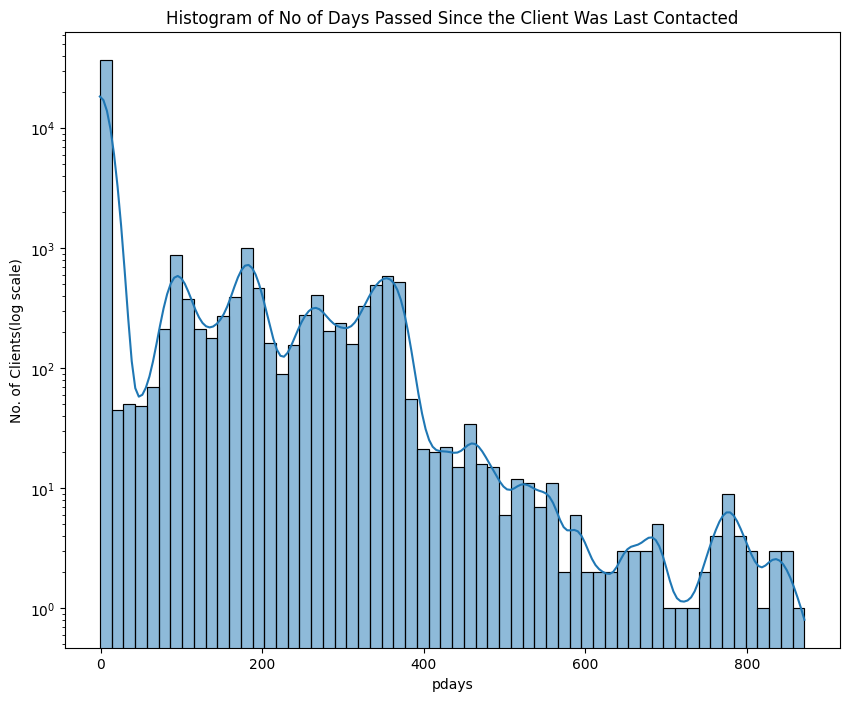

In [112]:
plt.figure(figsize=(10,8))
sns.histplot(data=df2, x="pdays", bins=60, kde=True)
plt.title("Histogram of No of Days Passed Since the Client Was Last Contacted")
plt.yscale('log')
plt.ylabel("No. of Clients(log scale)")
plt.show()

In [113]:
df2["pdays"].median()

-1.0

In [114]:
len(df2[df2["pdays"]==-1])/len(df2)*100

81.73674548229414

+ This distribution is also highly right skewed. It indicates that most of the clients have been contacted recently or never have been contacted before.
+ Median of **pdays** is -1 i.e. never contacted before, it is also shown through the data that most of the clients (nearly 81.73%) have never been contacted before.

### o. How many contacts were performed before the current campaign for each client?

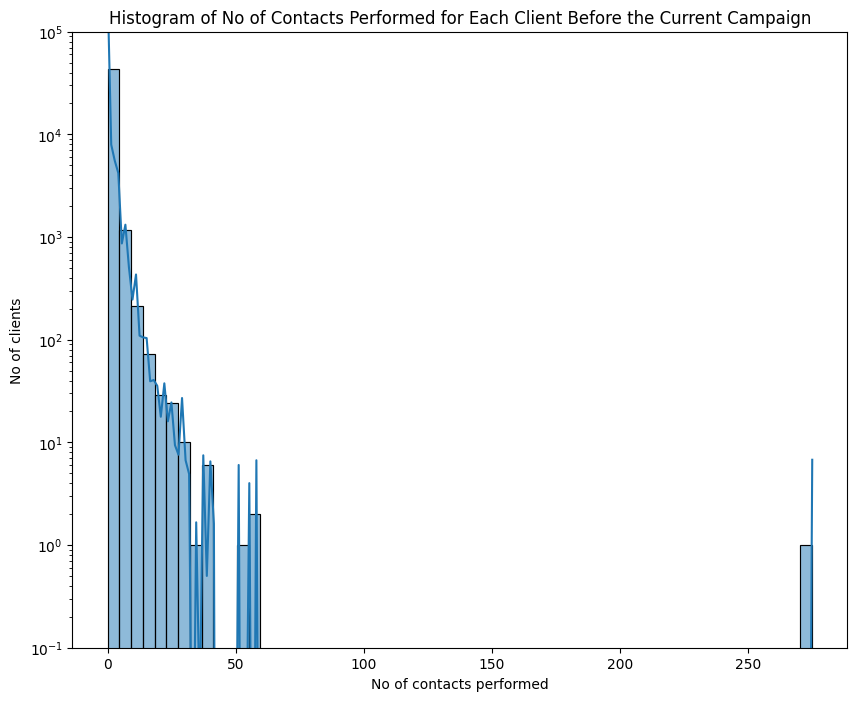

In [115]:
plt.figure(figsize=(10,8))
sns.histplot(data=df2, x="previous", bins=60, kde=True)
plt.xlabel('No of contacts performed')
plt.ylabel('No of clients')
plt.title("Histogram of No of Contacts Performed for Each Client Before the Current Campaign")
plt.yscale('log')
plt.ylim(top=1e5,bottom=0.1)
plt.show()

In [116]:
df2["previous"].median()

0.0

In [117]:
len(df2[df2["previous"]==0])/len(df2)*100

81.73674548229414

+ As seen in **pdays** distribution we saw that most of the people (nearly 81.73%) have never been contacted before and so the median of no of **previous** contacts is as expected, i.e. 0.
+ This distribution is also highly right skewed indicating only few clients being contacted repeatedly.

### p. What were the outcomes of the previous marketing campaigns?

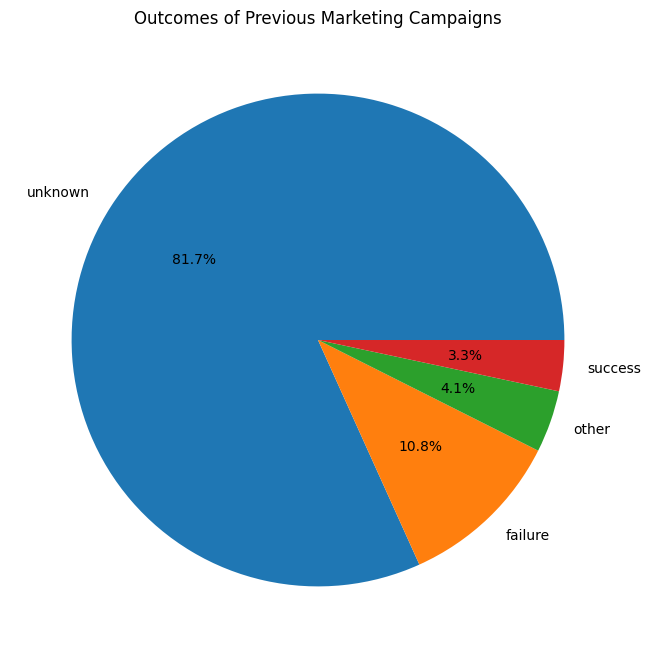

In [118]:
plt.figure(figsize=(10,8))
plt.pie(df2["poutcome"].value_counts().values,labels = df2["poutcome"].value_counts().keys(), autopct = '%0.1f%%')
plt.title("Outcomes of Previous Marketing Campaigns")
plt.show()

In [119]:
len(df2[(df2["pdays"]==-1) & (df2["poutcome"]=="unknown")]) == len(df2[(df2["pdays"]==-1)])

True

+ Since we saw previously that most of the clients (81.73%) have never been contacted before, so most of their contact outcome is unknown, thus majority of outcomes (81.7%) are unknown.

+ Only a small part of outcomes have actual results i.e failure(10.8%) and success(3.3%)
+ 4.1% have other as the outcome indicating neither success nor failure.

### q. What is the distribution of clients who subscribed to a term deposit vs. those who did not?

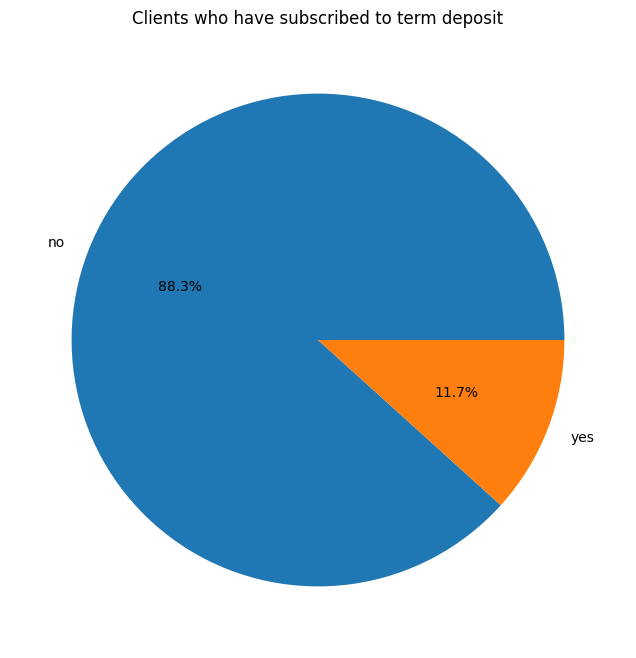

In [120]:
plt.figure(figsize=(10,8))
plt.pie(df2["y"].value_counts().values,labels = df2["y"].value_counts().keys(), autopct = '%0.1f%%')
plt.title("Clients who have subscribed to term deposit")
plt.show()

+ Only a few clients (11.7%) have subscribed to term deposit.
+ While majority of them (88.3%) did not subscribe to a term deposit.

### r. Are there any correlations between different attributes and the likelihood of subscribing to a term deposit?

#### 1. Correlation with job

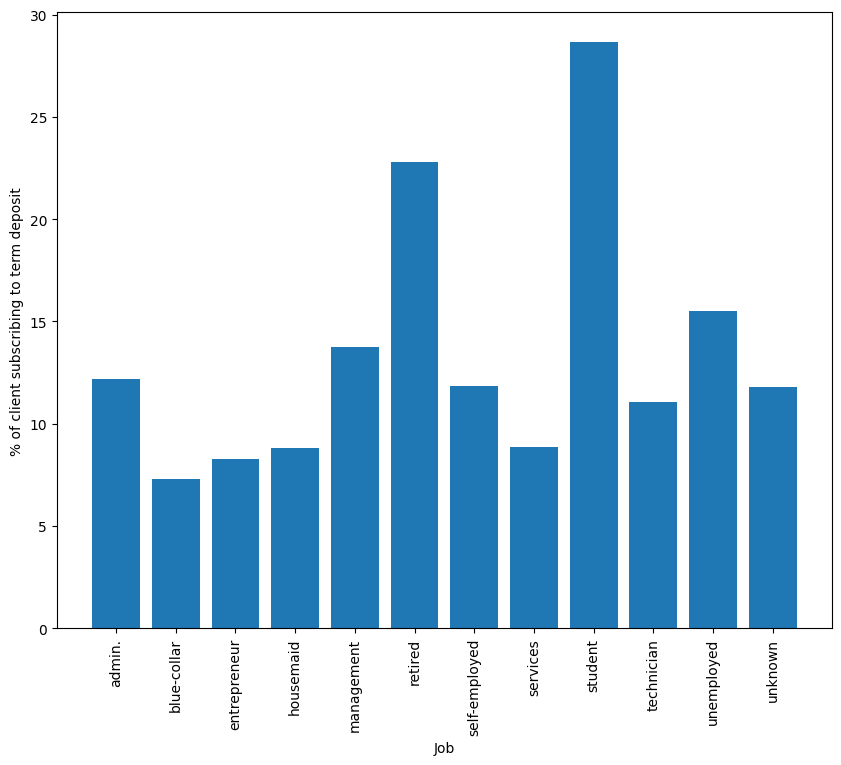

In [19]:
temp = df2.groupby("job", observed=False)["y"].value_counts(sort=True).unstack()
temp["%yes"] = temp["yes"]/(temp['yes']+temp["no"])*100

plt.figure(figsize=(10,8))
plt.bar(temp.reset_index()["job"],temp["%yes"])
plt.xticks(rotation='vertical')
plt.xlabel("Job")
plt.ylabel("% of client subscribing to term deposit")
plt.show()

+ Students show high chances of subscription to term deposit.
+ Blue collar and entrepreneur show low chances of subscription.
+ Retired people also have a relatively higher chance of subscribing to term deposit.

#### 2. Correlation with marital status

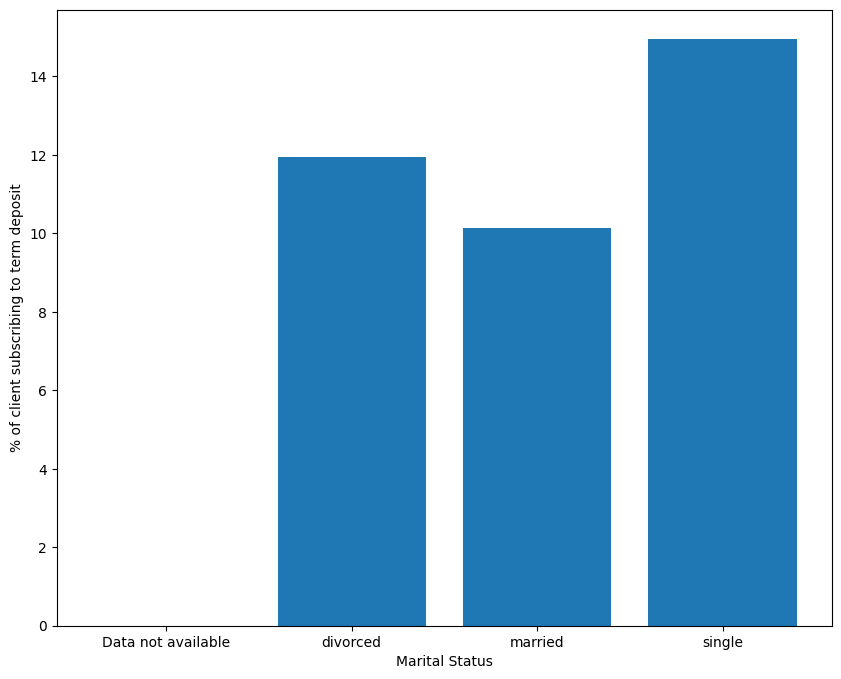

In [21]:
temp = df2.groupby("marital", observed=False)["y"].value_counts(sort=True).unstack()
temp["%yes"] = temp["yes"]/(temp['yes']+temp["no"])*100

plt.figure(figsize=(10,8))
plt.bar(temp.reset_index()["marital"],temp["%yes"])
plt.xlabel("Marital Status")
plt.ylabel("% of client subscribing to term deposit")
plt.show()

+ Single clients have higher chances of subscribing to term deposit.
+ Married clients have fairly lower chances of subscription to term deposit, maybe due to more responsibilities.
+ Divorced clients exhibit relatively high subscription rates, suggesting a greater demand for financial security after divorce.

#### 3. Correlation with education

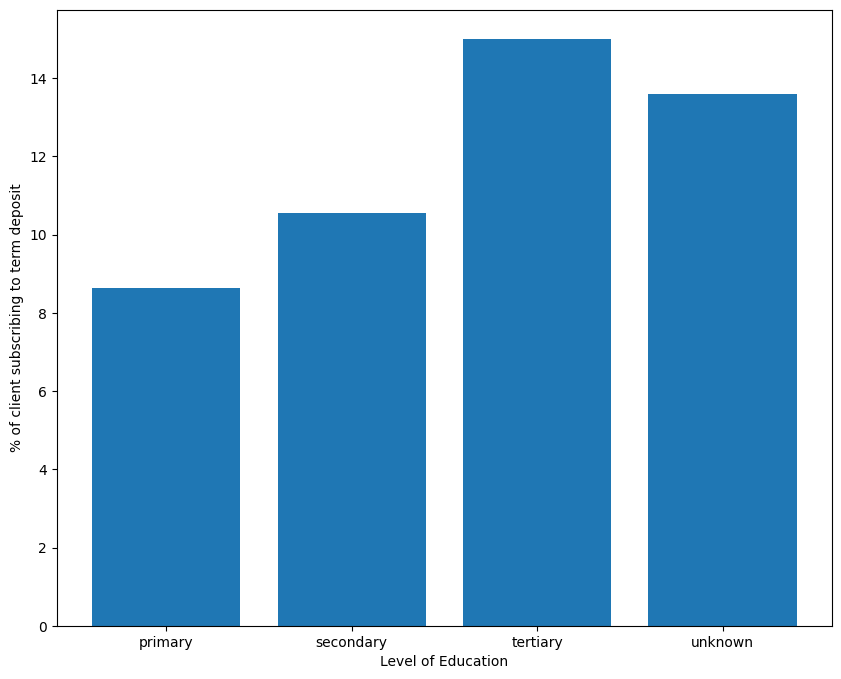

In [22]:
temp = df2.groupby("education", observed=False)["y"].value_counts(sort=True).unstack()
temp["%yes"] = temp["yes"]/(temp['yes']+temp["no"])*100

plt.figure(figsize=(10,8))
plt.bar(temp.reset_index()["education"],temp["%yes"])
plt.xlabel("Level of Education")
plt.ylabel("% of client subscribing to term deposit")
plt.show()

+ Clients with tertiary level of education have higher chance of subscribing to a term deposit.
+ Subscription rate is lower in clients with secondary level of education and then lowest in clients with primary level of education.
+ Some of the missing data were marked unknown which could not be analysed and thus creates few ambiguities in our analysis.

#### 4. Correlation with default status

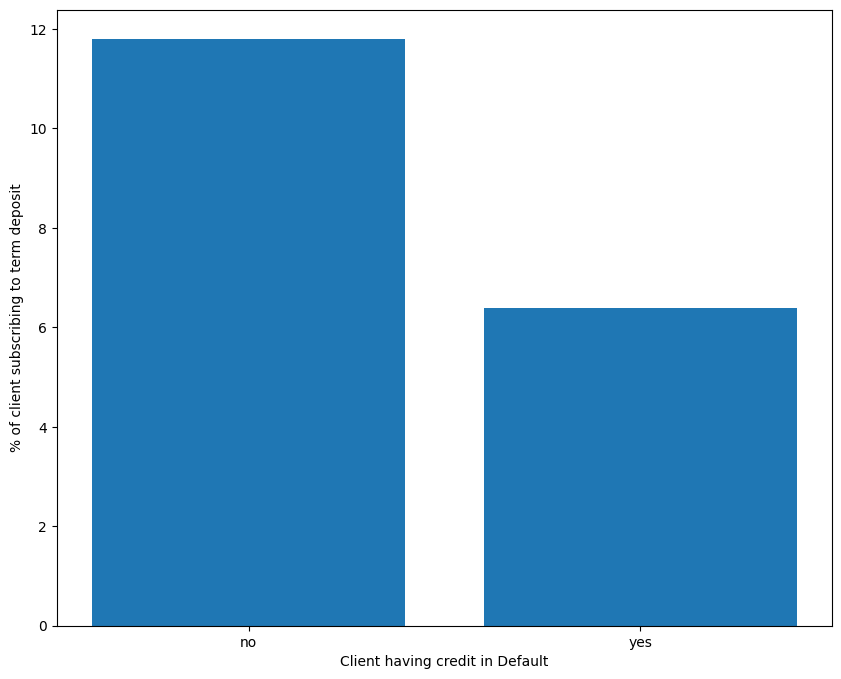

In [23]:
temp = df2.groupby("default", observed=False)["y"].value_counts(sort=True).unstack()
temp["%yes"] = temp["yes"]/(temp['yes']+temp["no"])*100

plt.figure(figsize=(10,8))
plt.bar(temp.reset_index()["default"],temp["%yes"])
plt.xlabel("Client having credit in Default")
plt.ylabel("% of client subscribing to term deposit")
plt.show()

+ Clients which have no credit in default have higher chance in subscribing to term deposit.
+ Clients which have credit in default have lower chance in subscribing to term deposit.
+ This shows that default is an important aspect while measuring subscription rates for term deposit.

#### 5. Correlation with housing loan

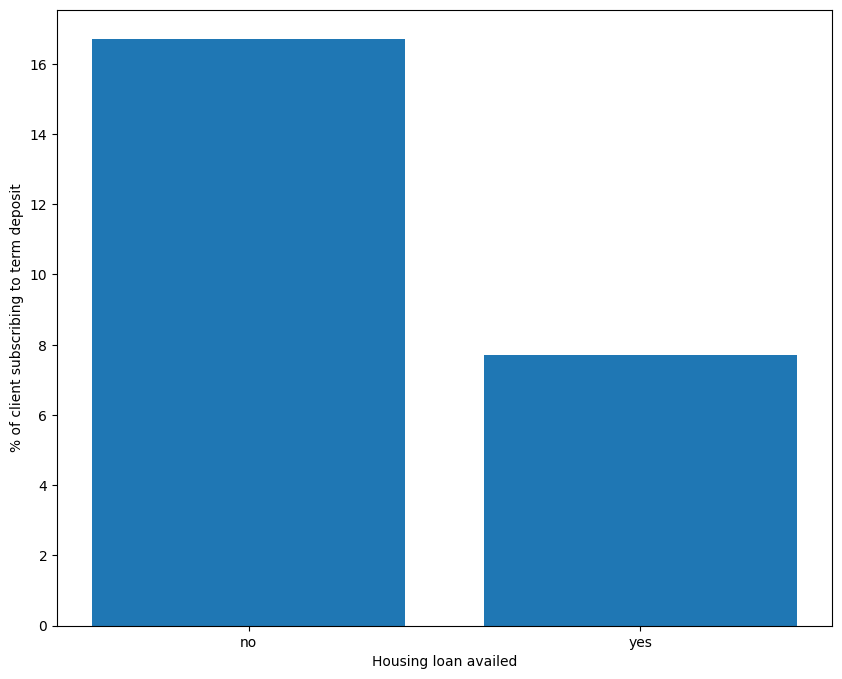

In [24]:
temp = df2.groupby("housing", observed=False)["y"].value_counts(sort=True).unstack()
temp["%yes"] = temp["yes"]/(temp['yes']+temp["no"])*100

plt.figure(figsize=(10,8))
plt.bar(temp.reset_index()["housing"],temp["%yes"])
plt.xlabel("Housing loan availed")
plt.ylabel("% of client subscribing to term deposit")
plt.show()

+ Clients which dont have housing loans have higher chance in subscribing to term deposit as compared to those which have.
+ This shows that housing loan is also an important aspect while measuring subscription rates for term deposit as clients with no loans have more financial freedom.

#### 6. Correlation with personal loan

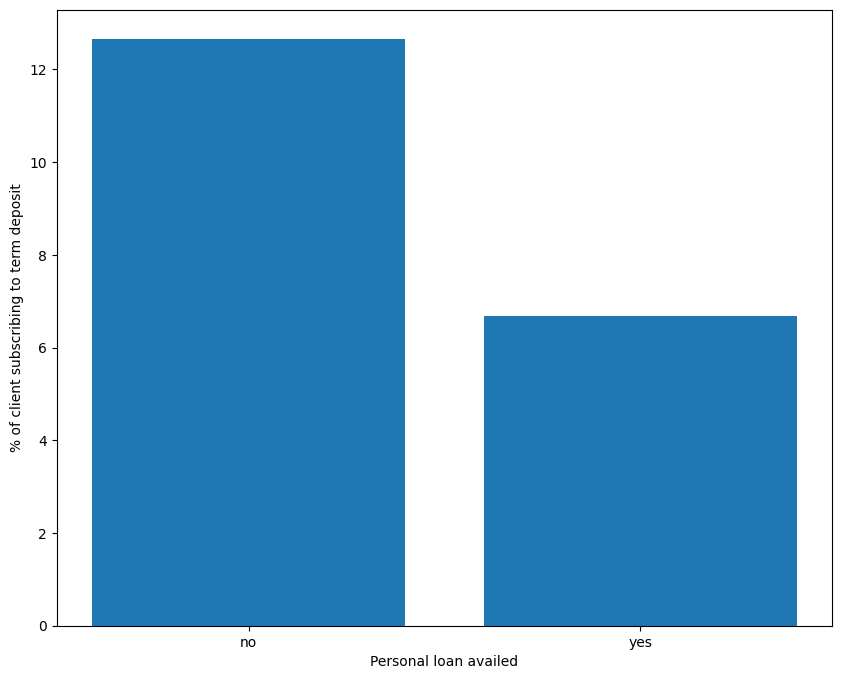

In [25]:
temp = df2.groupby("loan", observed=False)["y"].value_counts(sort=True).unstack()
temp["%yes"] = temp["yes"]/(temp['yes']+temp["no"])*100

plt.figure(figsize=(10,8))
plt.bar(temp.reset_index()["loan"],temp["%yes"])
plt.xlabel("Personal loan availed")
plt.ylabel("% of client subscribing to term deposit")
plt.show()

+ Clients which dont have personal loans have higher chance in subscribing to term deposit as compared to those which have it.
+ This shows that personal loan is also an important aspect while measuring subscription rates for term deposit as clients with no loans have more financial freedom.

#### 7. Correlation with means of communication

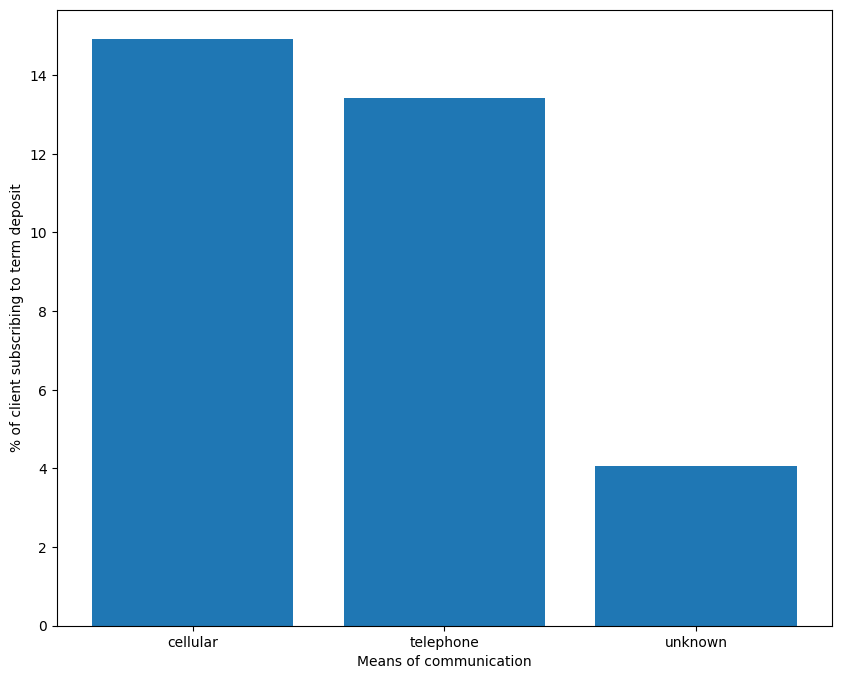

In [26]:
temp = df2.groupby("contact", observed=False)["y"].value_counts(sort=True).unstack()
temp["%yes"] = temp["yes"]/(temp['yes']+temp["no"])*100

plt.figure(figsize=(10,8))
plt.bar(temp.reset_index()["contact"],temp["%yes"])
plt.xlabel("Means of communication")
plt.ylabel("% of client subscribing to term deposit")
plt.show()

+ Communication through cellular phone can lead to higher chances of subscription of term deposit.
+ Telephone as a means of communication has lesser chance of subscription.
+ There a few unknown data leading to ambiguities in analysis.

#### 8. Correlation with last contact month

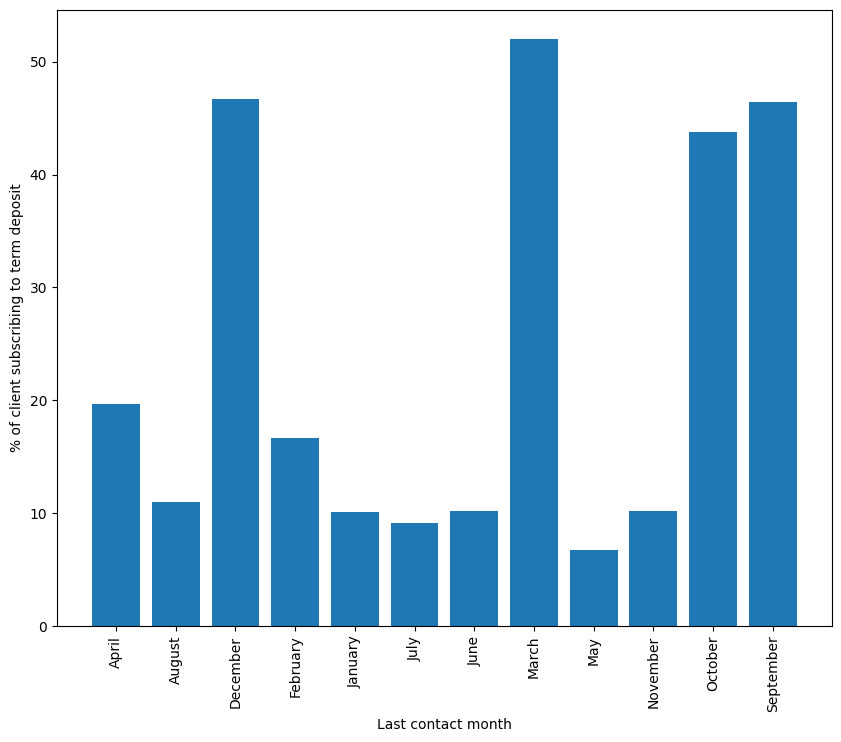

In [28]:
temp = df2.groupby(df2["date"].dt.month_name())["y"].value_counts(sort=True).unstack()
temp["%yes"] = temp["yes"]/(temp['yes']+temp["no"])*100

plt.figure(figsize=(10,8))
plt.bar(temp.reset_index()["date"],temp["%yes"])
plt.xlabel("Last contact month")
plt.ylabel("% of client subscribing to term deposit")
plt.xticks(rotation='vertical')
plt.show()

+ March, December, October and September have higher chance of getting subscriptions.
+ While rest months have significantly lower chances.

#### 9. Correlation with age


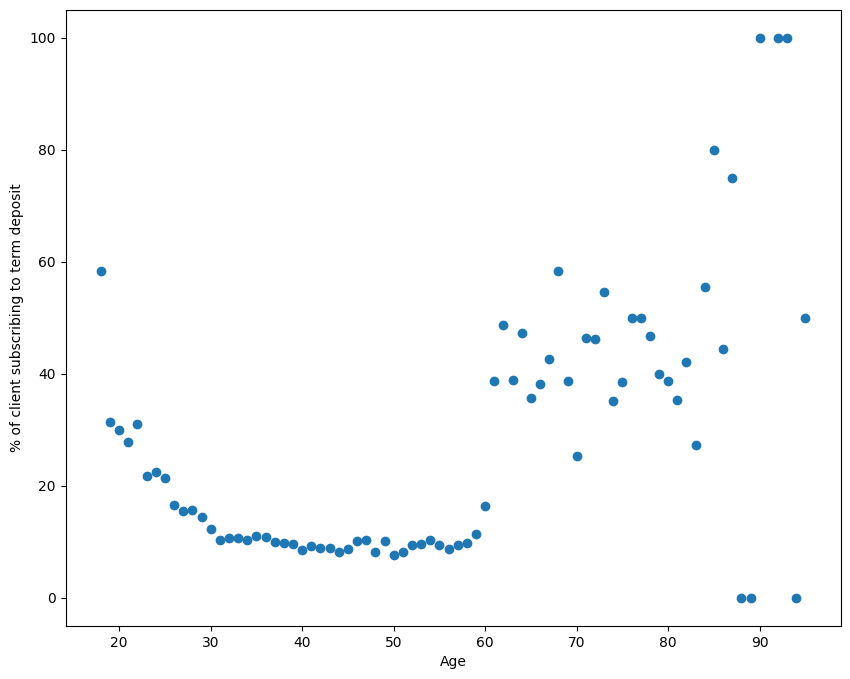

In [29]:
temp = df2.groupby(df2["age"])["y"].value_counts(sort=True).unstack()
temp["%yes"] = temp["yes"]/(temp['yes']+temp["no"])*100

plt.figure(figsize=(10,8))
plt.scatter(temp.reset_index()["age"],temp["%yes"])
plt.xlabel("Age")
plt.ylabel("% of client subscribing to term deposit")
plt.show()

+ Clients with lower age have a lower chance of subscribing to a term deposit.
+ Clients with age above 60 are more likely to subscribe to a term deposit.
+ It shows that people with higher age are less likely to take risk and thus settle with a lower risk financial option i.e term deposit.

#### 10. Correlation with balance

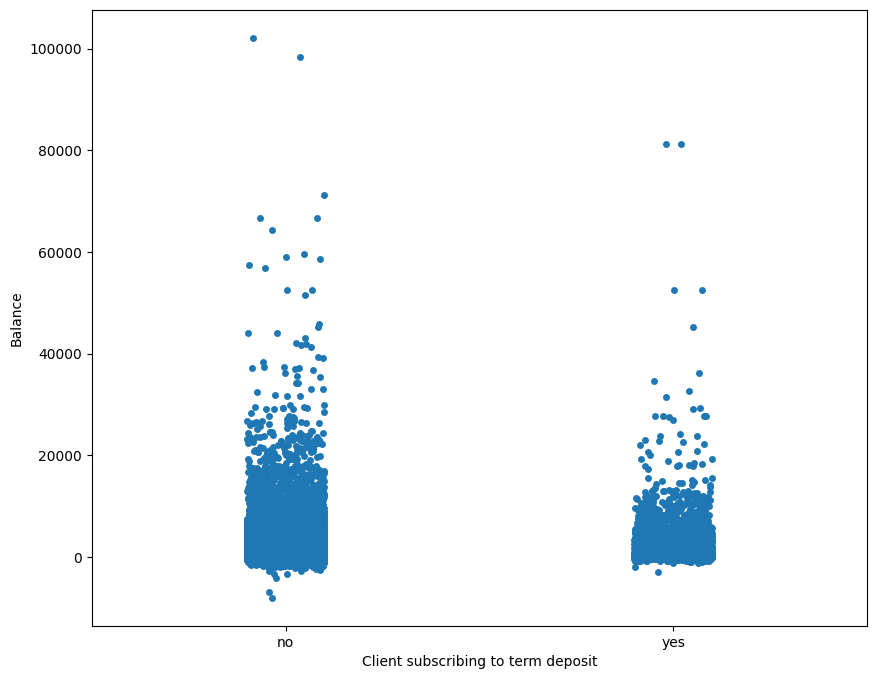

In [30]:
plt.figure(figsize=(10,8))
sns.stripplot(data=df2, x="y", y="balance")
plt.xlabel("Client subscribing to term deposit")
plt.ylabel("Balance")
plt.show()

In [131]:
len(df2[(df2['y']=='yes')&(df2['balance']<20000)])/len(df2[df2['balance']<20000])*100

11.684215202807765

+ Clients having lower balance (<20000) have low chance of subscribing to term deposit (nearly 11.7%).